## CSV Loader

In [ ]:
!pip install -qU langchain_community

In [8]:
from langchain_community.document_loaders import CSVLoader

loader = CSVLoader(file_path="C:/Users/kowm6/Desktop/titanic.csv")

docs = loader.load()

In [9]:
print(len(docs))

891


## Metadata

In [10]:
print(docs[0].metadata)

{'source': 'C:/Users/kowm6/Desktop/titanic.csv', 'row': 0}


## Contents

In [17]:
print(docs[0].page_content)

PassengerId: 1
Survived: 0
Pclass: 3
Name: Braund, Mr. Owen Harris
Sex: male
Age: 22
SibSp: 1
Parch: 0
Ticket: A/5 21171
Fare: 7.25
Cabin: 
Embarked: S


In [50]:
loader = CSVLoader(
    file_path="C:/Users/kowm6/Desktop/titanic.csv",
    csv_args={
        "delimiter" : ",",
        "quotechar" : '"',  
         "fieldnames": [
            "Passenger ID",
            "Survival (1: Survived, 0: Died)",
            "Passenger Class",
            "Name",
            "Sex",
            "Age",
            "Number of Siblings/Spouses Aboard",
            "Number of Parents/Children Aboard",
            "Ticket Number",
            "Fare",
            "Cabin",
            "Port of Embarkation",
        ],  # 필드 이름
    }
)

In [51]:
docs = loader.load()   

In [52]:
print(docs[0].metadata)

{'source': 'C:/Users/kowm6/Desktop/titanic.csv', 'row': 0}


In [54]:
print(docs[0].page_content)

Passenger ID: PassengerId
Survival (1: Survived, 0: Died): Survived
Passenger Class: Pclass
Name: Name
Sex: Sex
Age: Age
Number of Siblings/Spouses Aboard: SibSp
Number of Parents/Children Aboard: Parch
Ticket Number: Ticket
Fare: Fare
Cabin: Cabin
Port of Embarkation: Embarked


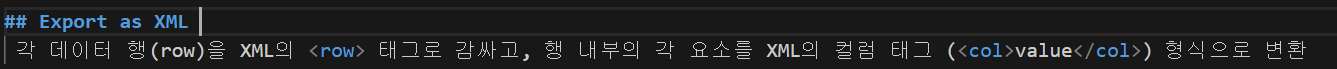

In [60]:
row = docs[1].page_content.split("\n")
row_str = "<row>"

for element in row:
    splitted_element = element.split(":")
    value = splitted_element[1]
    col = ":".join(splitted_element[:-1])
    row_str += f"<{col}>{value.strip()}</{col}>"
row_str += "</row>"

print(row_str)

<row><Passenger ID>1</Passenger ID><Survival (1: Survived, 0: Died)>Survived, 0</Survival (1: Survived, 0: Died)><Passenger Class>3</Passenger Class><Name>Braund, Mr. Owen Harris</Name><Sex>male</Sex><Age>22</Age><Number of Siblings/Spouses Aboard>1</Number of Siblings/Spouses Aboard><Number of Parents/Children Aboard>0</Number of Parents/Children Aboard><Ticket Number>A/5 21171</Ticket Number><Fare>7.25</Fare><Cabin></Cabin><Port of Embarkation>S</Port of Embarkation></row>


## Unstructure CSV Loader

In [67]:
!pip install -qU unstructured

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.9.2 which is incompatible.


In [72]:
from langchain_community.document_loaders.csv_loader import UnstructuredCSVLoader

# 비구조화 CSV Loader 인스턴스 생성
loader = UnstructuredCSVLoader(
    file_path="C:/Users/kowm6/Desktop/titanic.csv",
    mode = "elements")

docs = loader.load()
print(docs[0].metadata['text_as_html'][:1000])

<table><tr><td>PassengerId</td><td>Survived</td><td>Pclass</td><td>Name</td><td>Sex</td><td>Age</td><td>SibSp</td><td>Parch</td><td>Ticket</td><td>Fare</td><td>Cabin</td><td>Embarked</td></tr><tr><td>1</td><td>0</td><td>3</td><td>Braund, Mr. Owen Harris</td><td>male</td><td>22</td><td>1</td><td>0</td><td>A/5 21171</td><td>7.25</td><td/><td>S</td></tr><tr><td>2</td><td>1</td><td>1</td><td>Cumings, Mrs. John Bradley (Florence Briggs Thayer)</td><td>female</td><td>38</td><td>1</td><td>0</td><td>PC 17599</td><td>71.2833</td><td>C85</td><td>C</td></tr><tr><td>3</td><td>1</td><td>3</td><td>Heikkinen, Miss. Laina</td><td>female</td><td>26</td><td>0</td><td>0</td><td>STON/O2. 3101282</td><td>7.925</td><td/><td>S</td></tr><tr><td>4</td><td>1</td><td>1</td><td>Futrelle, Mrs. Jacques Heath (Lily May Peel)</td><td>female</td><td>35</td><td>1</td><td>0</td><td>113803</td><td>53.1</td><td>C123</td><td>S</td></tr><tr><td>5</td><td>0</td><td>3</td><td>Allen, Mr. William Henry</td><td>male</td><td>35</

## DataFrameLoader

In [73]:
import pandas as pd

df = pd.read_csv("C:/Users/kowm6/Desktop/titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
from langchain_community.document_loaders import DataFrameLoader

loader = DataFrameLoader(df, page_content_column = "Name") # Name을 먼저 가져옴

docs = loader.load()

print(docs[0].page_content)

print(docs[0].metadata)

Braund, Mr. Owen Harris
{'PassengerId': 1, 'Survived': 0, 'Pclass': 3, 'Sex': 'male', 'Age': 22.0, 'SibSp': 1, 'Parch': 0, 'Ticket': 'A/5 21171', 'Fare': 7.25, 'Cabin': nan, 'Embarked': 'S'}


In [86]:
# 큰 테이블에 대한 지연 로딩, 전체 테이블을 메모리에 로드하지 않음
for row in loader.lazy_load():
    print(row)
    break  # 첫 행만 출력


page_content='Braund, Mr. Owen Harris' metadata={'PassengerId': 1, 'Survived': 0, 'Pclass': 3, 'Sex': 'male', 'Age': 22.0, 'SibSp': 1, 'Parch': 0, 'Ticket': 'A/5 21171', 'Fare': 7.25, 'Cabin': nan, 'Embarked': 'S'}
